# 4. Next prediction (with exogenous variables)

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [108]:
data_url = 'data.pkl'
df = pd.read_pickle(data_url)
df.head()

,Date,usd_aud,Fuel_price,Oil_price
33,2019-06-03,0.6977,127.3,53.25
34,2019-06-04,0.6991,127.3,53.50
35,2019-06-05,0.6970,127.3,51.57
36,2019-06-06,0.6977,127.3,52.59
37,2019-06-07,0.6999,126.3,53.95


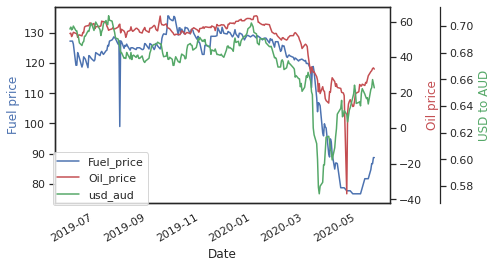

In [109]:
# Let's plot the raw data
ax = df.plot(x="Date", y="Fuel_price", legend=False, color="b")
ax2 = ax.twinx()
df.plot(x="Date", y="Oil_price", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
df.plot(x="Date", y="usd_aud", ax=ax3, legend=False, color="g")

ax.set_xlabel("Date")
ax.set_ylabel("Fuel price")
ax2.set_ylabel("Oil price")
ax3.set_ylabel("USD to AUD")

ax.yaxis.label.set_color(color="b")
ax2.yaxis.label.set_color(color="r")
ax3.yaxis.label.set_color(color="g")

ax.figure.legend(bbox_to_anchor=(0.11, 0.2), loc='lower left')
plt.show()

## Using exogenous variables and use ARIMAX
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

### "Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)"
This is directly from the website

In [130]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

/home/john/.local/share/virtualenvs/edX-SvedPgMN/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[[0.41717706 0.8966271 ]]


/home/john/.local/share/virtualenvs/edX-SvedPgMN/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/home/john/.local/share/virtualenvs/edX-SvedPgMN/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


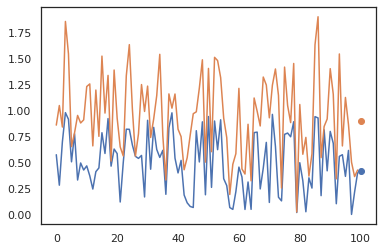

In [147]:
# Plotting the input data
plt.plot(range(100), [data[i][0] for i in range(100)])
plt.plot(range(100), [data[i][1] for i in range(100)])
# and plotting the two predictions
plt.scatter(100, yhat[0][0], marker='o')
plt.scatter(100, yhat[0][1], marker='o')

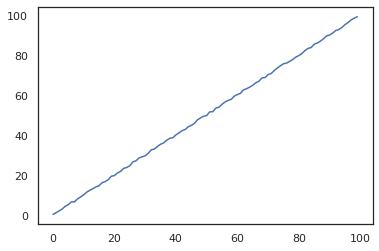

In [148]:
# Plotting this other input data
plt.plot(range(100), data_exog)

## Another method

In [149]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
data.index = data['time'];
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;
plt.figure(figsize=(15,5));
plt.plot(data.index,data['drivers']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

ModuleNotFoundError: No module named 'pyflux'